In [8]:
import os

import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.spatial.distance import pdist, squareform
from nets import hand_landmark_model
from utils.data_generator import DataGenerator

## Build Model

In [2]:
model = hand_landmark_model.build_hand_landmark_model()

In [3]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
p_re_lu (PReLU)                 (None, 128, 128, 16) 262144      conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 8)  136         p_re_lu[0][0]                    
______________________________________________________________________________________________

In [4]:
adam = tf.keras.optimizers.Adam()
model.compile(optimizer='adam', loss='mse')

## Data Generator

In [11]:
train_data_generator = DataGenerator(image_dir=os.path.join('data', 'image'), batch_size=16,
                                     annotation_dir=os.path.join('data', 'annotation'))
val_data_generator = DataGenerator(image_dir=os.path.join('data', 'image'), batch_size=16,
                                     annotation_dir=os.path.join('data', 'annotation'))

## Train

In [8]:
history = model.fit(x=train_data_generator, epochs=1000)

Epoch 1/1000
6/6 [==============================] - 2s 331ms/step - loss: 17511.1094
Epoch 2/1000
6/6 [==============================] - 2s 335ms/step - loss: 6615.8511
Epoch 3/1000
6/6 [==============================] - 2s 330ms/step - loss: 6745.7485
Epoch 4/1000
6/6 [==============================] - 2s 318ms/step - loss: 3284.2637
Epoch 5/1000
6/6 [==============================] - 2s 336ms/step - loss: 1864.1027
Epoch 6/1000
6/6 [==============================] - 2s 311ms/step - loss: 1580.2886
Epoch 7/1000
6/6 [==============================] - 2s 305ms/step - loss: 1281.2716
Epoch 8/1000
6/6 [==============================] - 2s 325ms/step - loss: 1299.5455
Epoch 9/1000
6/6 [==============================] - 2s 318ms/step - loss: 1156.1835
Epoch 10/1000
6/6 [==============================] - 2s 295ms/step - loss: 1096.1212
Epoch 11/1000
6/6 [==============================] - 2s 317ms/step - loss: 1018.6865
Epoch 12/1000
6/6 [==============================] - 2s 327ms/step - loss

6/6 [==============================] - 2s 315ms/step - loss: 19.3614
Epoch 196/1000
6/6 [==============================] - 2s 327ms/step - loss: 18.9408
Epoch 197/1000
6/6 [==============================] - 2s 315ms/step - loss: 18.0009
Epoch 198/1000
6/6 [==============================] - 2s 316ms/step - loss: 18.1007
Epoch 199/1000
6/6 [==============================] - 2s 322ms/step - loss: 15.1563
Epoch 200/1000
6/6 [==============================] - 2s 328ms/step - loss: 18.1718
Epoch 201/1000
6/6 [==============================] - 2s 301ms/step - loss: 15.3789
Epoch 202/1000
6/6 [==============================] - 2s 324ms/step - loss: 14.0051
Epoch 203/1000
6/6 [==============================] - 2s 296ms/step - loss: 13.5953
Epoch 204/1000
6/6 [==============================] - 2s 301ms/step - loss: 14.7244
Epoch 205/1000
6/6 [==============================] - 2s 325ms/step - loss: 13.6661
Epoch 206/1000
6/6 [==============================] - 2s 310ms/step - loss: 13.7525
Epoch 2

6/6 [==============================] - 2s 314ms/step - loss: 0.3663
Epoch 392/1000
6/6 [==============================] - 2s 317ms/step - loss: 0.3390
Epoch 393/1000
6/6 [==============================] - 2s 324ms/step - loss: 0.3567
Epoch 394/1000
6/6 [==============================] - 2s 309ms/step - loss: 0.3534
Epoch 395/1000
6/6 [==============================] - 2s 326ms/step - loss: 0.3332
Epoch 396/1000
6/6 [==============================] - 2s 298ms/step - loss: 0.4534
Epoch 397/1000
6/6 [==============================] - 2s 313ms/step - loss: 0.5449
Epoch 398/1000
6/6 [==============================] - 2s 321ms/step - loss: 0.7858
Epoch 399/1000
6/6 [==============================] - 2s 333ms/step - loss: 0.9007
Epoch 400/1000
6/6 [==============================] - 2s 300ms/step - loss: 0.5766
Epoch 401/1000
6/6 [==============================] - 2s 304ms/step - loss: 0.6079
Epoch 402/1000
6/6 [==============================] - 2s 286ms/step - loss: 0.9590
Epoch 403/1000
6/6 

6/6 [==============================] - 2s 319ms/step - loss: 0.0642
Epoch 588/1000
6/6 [==============================] - 2s 307ms/step - loss: 0.0624
Epoch 589/1000
6/6 [==============================] - 2s 292ms/step - loss: 0.0661
Epoch 590/1000
6/6 [==============================] - 2s 319ms/step - loss: 0.0640
Epoch 591/1000
6/6 [==============================] - 2s 294ms/step - loss: 0.0623
Epoch 592/1000
6/6 [==============================] - 2s 317ms/step - loss: 0.0587
Epoch 593/1000
6/6 [==============================] - 2s 304ms/step - loss: 0.0603
Epoch 594/1000
6/6 [==============================] - 2s 315ms/step - loss: 0.0597
Epoch 595/1000
6/6 [==============================] - 2s 272ms/step - loss: 0.0537
Epoch 596/1000
6/6 [==============================] - 2s 328ms/step - loss: 0.0635
Epoch 597/1000
6/6 [==============================] - 2s 297ms/step - loss: 0.0617
Epoch 598/1000
6/6 [==============================] - 2s 309ms/step - loss: 0.0606
Epoch 599/1000
6/6 

6/6 [==============================] - 2s 309ms/step - loss: 0.1048
Epoch 784/1000
6/6 [==============================] - 2s 331ms/step - loss: 0.1022
Epoch 785/1000
6/6 [==============================] - 2s 260ms/step - loss: 0.2046
Epoch 786/1000
6/6 [==============================] - 1s 220ms/step - loss: 0.2508
Epoch 787/1000
6/6 [==============================] - 1s 218ms/step - loss: 0.4818
Epoch 788/1000
6/6 [==============================] - 1s 216ms/step - loss: 0.5986
Epoch 789/1000
6/6 [==============================] - 1s 214ms/step - loss: 0.3591
Epoch 790/1000
6/6 [==============================] - 1s 225ms/step - loss: 0.5435
Epoch 791/1000
6/6 [==============================] - 1s 219ms/step - loss: 0.7820
Epoch 792/1000
6/6 [==============================] - 1s 218ms/step - loss: 0.6443
Epoch 793/1000
6/6 [==============================] - 1s 224ms/step - loss: 0.8355
Epoch 794/1000
6/6 [==============================] - 1s 221ms/step - loss: 0.5982
Epoch 795/1000
6/6 

6/6 [==============================] - 1s 232ms/step - loss: 2.0957
Epoch 980/1000
6/6 [==============================] - 1s 222ms/step - loss: 1.6918
Epoch 981/1000
6/6 [==============================] - 1s 231ms/step - loss: 1.4922
Epoch 982/1000
6/6 [==============================] - 1s 227ms/step - loss: 1.2022
Epoch 983/1000
6/6 [==============================] - 1s 230ms/step - loss: 1.4112
Epoch 984/1000
6/6 [==============================] - 1s 232ms/step - loss: 1.3692
Epoch 985/1000
6/6 [==============================] - 1s 237ms/step - loss: 0.7194
Epoch 986/1000
6/6 [==============================] - 1s 234ms/step - loss: 0.6046
Epoch 987/1000
6/6 [==============================] - 1s 228ms/step - loss: 0.4476
Epoch 988/1000
6/6 [==============================] - 1s 235ms/step - loss: 0.3367
Epoch 989/1000
6/6 [==============================] - 1s 231ms/step - loss: 0.2798
Epoch 990/1000
6/6 [==============================] - 1s 189ms/step - loss: 0.2610
Epoch 991/1000
6/6 

## Plot History

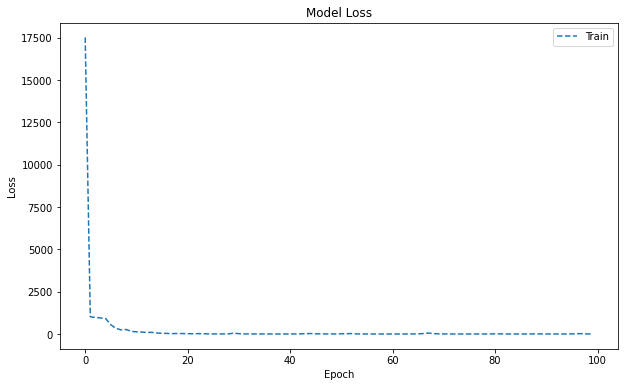

In [9]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'][::10], ls='--')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'])
plt.show()

## Simple Test

In [1]:
import glob
import json

In [2]:
from utils.encoder import encode_landmarks, max_distance, preprocess, get_triangle

In [3]:
def draw_skeleton(landmarks, points_size=30, line_width=3):
    xs, ys = [p[0] for p in landmarks], [p[1] for p in landmarks]
    for i in range(1, 18, 4):
        temp_x = [xs[0]] + [xs[i+j] for j in range(4)]
        temp_y = [ys[0]] + [ys[i+j] for j in range(4)]
        plt.plot(temp_x, temp_y, c=COLORS[i], linewidth=line_width, alpha=0.7)
    plt.scatter(landmarks[:,0], landmarks[:,1], color='steelblue', s=points_size, alpha=1)
    return None

In [4]:
COLORS = ['r', 'red', 'red', 'red', 'red', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'gold', 'gold', 'gold', 'gold', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'deeppink', 'deeppink', 'deeppink', 'deeppink']
JOINT_NAME = ['Wrist', 'TMCP', 'TPIP', 'TDIP', 'TTIP', 'IMCP', 'IPIP', 'IDIP', 'ITIP', 'MMCP', 'MPIP', 'MDIP', 'MTIP', 'RMCP', 'RPIP', 'RDIP', 'RTIP', 'PMCP', 'PPIP', 'PDIP', 'PTIP']

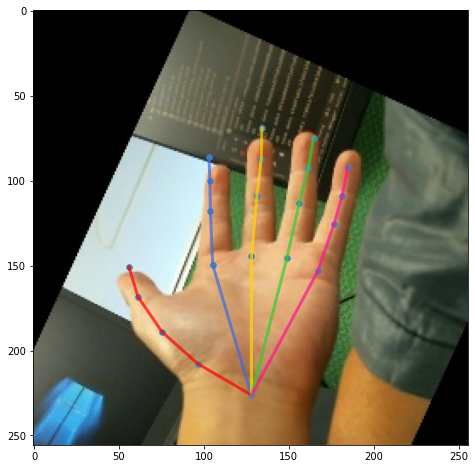

In [9]:
random_selected_file = os.path.split(np.random.choice(glob.glob('data/image/*')))[-1].split('.')[0]
image = cv2.imread(os.path.join('data', 'image', random_selected_file + '.jpg'))
with open(os.path.join('data', 'annotation', random_selected_file + '.json')) as json_file: anno = json.load(json_file)
raw_image = image.copy()
input_image, _ = preprocess(raw_image)

plt.figure(figsize=(10,8))
draw_skeleton(np.array(anno['landmark']))
plt.imshow(raw_image[:,:,::-1])
plt.show()

In [ ]:
model = tf.model.

In [10]:
pred = model.predict(input_image)

NameError: name 'model' is not defined

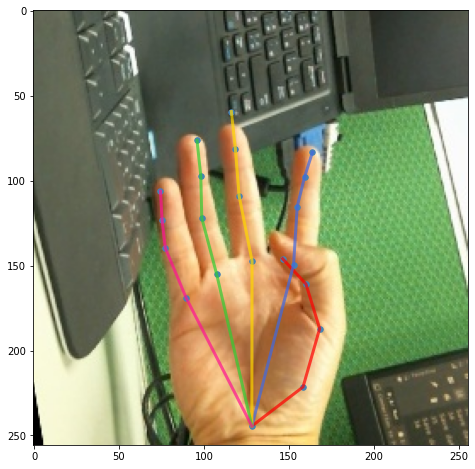

In [50]:
plt.figure(figsize=(10,8))
draw_skeleton(pred.reshape(-1, 2))
plt.imshow(raw_image[:,:,::-1])
plt.show()

## Save Model